In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import matplotlib.cm as cm
from lane_detection import *
from lane_following import *


/home/wgao/cv-intro-mine/lane_detection.py:80: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y1-y2)/(x1-x2)
/home/wgao/cv-intro-mine/lane_detection.py:124: RuntimeWarning: invalid value encountered in scalar divide
  xPoint = ((slopeList[i] * xInterceptList[i]) - (slopeList[j] * xInterceptList[j]))/(slopeList[i]-slopeList[j])


7.0986256030203485
picked new lane! fitness: 7.0986256030203485 <---------------------------------------
8.839798539126061
picked new lane! fitness: 8.839798539126061 <---------------------------------------
8.823226438548414
6.912021486702545
18.287662866376355
picked new lane! fitness: 18.287662866376355 <---------------------------------------
15.81863287531787
10.75991614880874
13.8844719671062
12.946657051483246
13.817409714347528
11.03274026038899
13.016181355451089
21.20398336735559
picked new lane! fitness: 21.20398336735559 <---------------------------------------
13.869173147805105
15.934616076232642
17.903191190372606
21.736821559787153
picked new lane! fitness: 21.736821559787153 <---------------------------------------
nan
19.652258171759275
11.430161258995163
17.65649398715896
14.008694225178958
nan
9.12469312335607
13.590761601388975
nan
21.203983367355587
16.278214832847834
6.841387974118182
15.90541829745566
83.51488088476988
18.677866455736037
7.17980979171172
20.1376

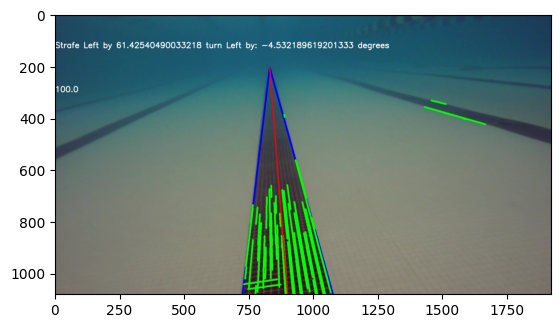

8.907331400090287
picked new lane! fitness: 8.907331400090287 <---------------------------------------
11.042847633240235
picked new lane! fitness: 11.042847633240235 <---------------------------------------
9.174054079780696
12.808242045227814
picked new lane! fitness: 12.808242045227814 <---------------------------------------
nan
21.81376491533656
picked new lane! fitness: 21.81376491533656 <---------------------------------------
10.943841416834164
nan
13.007184924588438
7.963379889410903
19.995945217599395
6.9894106748952245
8.995716643538014
nan
nan
nan
18.0711802223768
12.924243784618373
19.679979048311
7.791321008683022
6.946726963263459
17.897798577567016
12.814683029913521
7.853734687169044
15.820932391317498
83.09172944200034
16.989487506431253
83.25807726887547
8.886328549303357
18.537822061702165
18.282798021014628
nan
nan
21.256529103494742
20.02417321359761
18.419869002369282
11.164608287058837
7.321621701955401
9.087016113942969
nan
18.09253898405173
7.2226154855493245


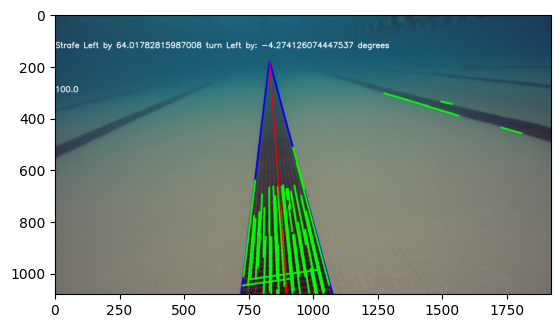

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
13.062305120679756
picked new lane! fitness: 13.062305120679756 <---------------------------------------
9.478715263481337
nan
9.131787747327357
9.066006169441756
14.986126409361301
picked new lane! fitness: 14.986126409361301 <---------------------------------------
7.153030619490662
18.21392284662006
picked new lane! fitness: 18.21392284662006 <---------------------------------------
7.1404464379418435
nan
13.050493993344874
5.954718470689105
8.314629186417463
7.953288895338668
8.10526673390256
nan
15.072741278397453
15.707798551762732
17.38113192623364
7.3887174000174
16.829949025496063
10.150403926963161
17.08503234256485
12.849679502815798
13.062305120679751
8.780438269182465
87.08916217383229
86.92867021399765
nan
15.225856305442159
18.165956529225532
14.92877361162186
11.345183754423447
nan
10.99825623826946
10.932474660383857
16.85259490030341
9.01949911043277
7.108191042167427
20.080391

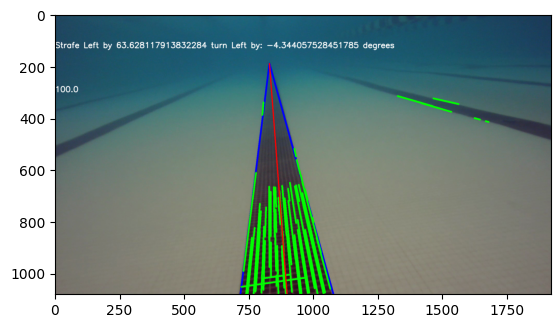

7.280444424675802
picked new lane! fitness: 7.280444424675802 <---------------------------------------
11.056493522549365
picked new lane! fitness: 11.056493522549365 <---------------------------------------
7.06637255373664
6.969695383168032
7.882421508495774
8.974657935925094
6.1267027005428965
nan
14.69701717740381
picked new lane! fitness: 14.69701717740381 <---------------------------------------
11.052160155479068
5.922542434649794
6.9994572131264245
13.036891973910958
10.458058005634305
5.956230967891247
10.909987297122077
nan
8.47286390183154
9.697280314848165
12.95418003784466
13.008656636131043
15.308692652117623
picked new lane! fitness: 15.308692652117623 <---------------------------------------
5.922542434649804
7.863840793861136
87.4194014226112
14.948655360430035
7.154519837289525
nan
88.88174015841795
8.635128490708485
13.131405499824353
9.957333485770741
11.049569913200045
nan
16.771929154678787
picked new lane! fitness: 16.771929154678787 <----------------------------

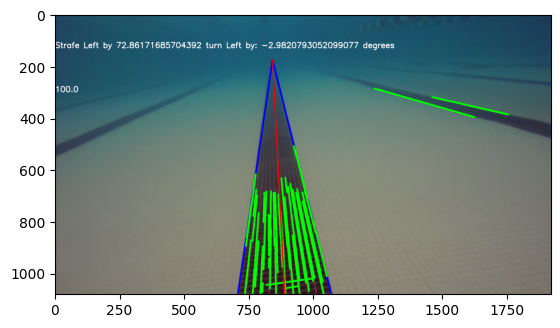

nan
nan
8.650270282366996
picked new lane! fitness: 8.650270282366996 <---------------------------------------
12.76619694111196
picked new lane! fitness: 12.76619694111196 <---------------------------------------
14.514759277107737
picked new lane! fitness: 14.514759277107737 <---------------------------------------
6.684253038616214
6.5502922577856015
10.890339416484156
nan
8.952571825271704
10.709272920438183
15.148700215636712
picked new lane! fitness: 15.148700215636712 <---------------------------------------
14.71294213295653
23.382949548466037
picked new lane! fitness: 23.382949548466037 <---------------------------------------
21.531008816290328
16.61333002084209
12.604194620153821
10.613905526183578
12.53963082639451
18.70270776901693
8.630801788548437
16.708573451658573
nan
18.555991456710967
16.613330020842078
20.421694881443113
17.80952744082895
14.71294213295653
6.572146277709139
8.160210485653236
10.438244764519355
8.543293984099604
16.694600575575855
21.112686619711496


KeyboardInterrupt: 

In [2]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
img_array = []
i = 0
ret = True
detectedLane = 0
failedToDetectLane = 0
while ret:
    if i > 300:
        break
    slopeSet = set() 
    i += 1
    ret, frame = cap.read()
    if(i%1 == 0 and i > 100):
        lines = detect_lines(frame, 100, 110, 3,10,10)
        #print (lines)
    
        #try: 
        #    frame = draw_lines(frame, lines,(0, 255, 0))
        #    print ("tried to draw lines")
        #except :
       #     pass
        try:
            lanes = detect_lanes(lines)
            #print ("tried to detect lanes")
            pickedLane = pick_lane(lanes)
            frame = draw_Single_lane(frame, pickedLane, (255, 0, 0))
            frame = draw_lines(frame, lines,(0, 255, 0))
            center_intercept, center_slope = get_lane_center(pickedLane)
            xPoint = pickedLane[0][2]
            yPoint = pickedLane[0][3]
            cv2.line(frame, (int(center_intercept), 1080), (int(xPoint), int(yPoint)), (0,0,255), 3)
            rec_dir = recommend_direction(center_intercept, center_slope)
            print (rec_dir)
            
            cv2.putText(frame, rec_dir, (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            detectedLane += 1
        except:
            failedToDetectLane += 1
            pass
        
        
        #recommend_direction(center_intercept, center_slope)
        
        height, width, layers = frame.shape
        size = (width,height)
        #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        #plt.show()
        accuracy = (detectedLane/(detectedLane+failedToDetectLane))*100
        cv2.putText(frame, str(accuracy), (0, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        img_array.append(frame)
        print(f"accuracy: {accuracy}%")
        print(f"currently on frame: {i}")
        #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        #plt.show()

out = cv2.VideoWriter('LetsSeeIt.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()#1500 2000

        